In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append('../src') 

from utils.data_loader import load_data


In [2]:
fraud_data= load_data('../data/raw/Fraud_Data.csv')

Data loaded successfully from ../data/raw/Fraud_Data.csv


In [3]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


2. Handle Missing Values

In [4]:
fraud_data.isna().sum()
# seems like there are no missing values in the dataset

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

3. Data Cleaning

Remove duplicates

In [5]:
# Check for duplicate rows
print(f"Initial shape: {fraud_data.shape}")

# Find all duplicate rows (keeping all occurrences)
duplicates = fraud_data[fraud_data.duplicated(keep=False)]

# Sort the duplicates to see them grouped together
duplicates_sorted = duplicates.sort_values(by=list(fraud_data.columns))

# Display the duplicates
print(f"\nNumber of duplicate rows (including originals): {len(duplicates)}")

# Count of fully duplicated rows (where keep='first' would remove)
duplicate_count = len(fraud_data) - len(fraud_data.drop_duplicates())
print(f"\nNumber of rows that would be dropped by drop_duplicates(): {duplicate_count}")

# no duplicate rows found

Initial shape: (151112, 11)

Number of duplicate rows (including originals): 0

Number of rows that would be dropped by drop_duplicates(): 0


Correct data types


=== Analysis for column: device_id ===
Number of unique values: 137956
Data type: object

Value counts (top 20 if many unique values):
device_id
ITUMJCKWEYNDD    20
CQTUVBYIWWWBC    20
EQYVNEGOFLAWK    20
NGQCKIADMZORL    20
KIPFSCNUGOLDP    20
ZUSVMDEZRBDTX    20
IGKYVZDBEGALB    19
CDFXVYHOIHPYP    19
EGLGSEGYPMMAM    19
SDJQRPKXQFBED    19
BWSMVSLCJXMCM    19
RWZCXZTQUORQL    18
OGBNHQHDZLGFZ    18
FFWAQIABHGYJC    18
QVMVTZOIJDKNR    18
XHZBVWFWHSGTQ    18
KPAAACGRQWYIK    18
XJWEQEWCBRAKD    18
UFBULQADXSSOG    18
GTIYVLCMAYBFA    18
Name: count, dtype: int64

Top category represents 0.01% of data

[Too many unique values to plot effectively]

Memory usage - Current: 9369076 bytes, As category: 13384964 bytes
Potential memory savings: -4015888 bytes (-42.9% reduction)



=== Analysis for column: source ===
Number of unique values: 3
Data type: object

Value counts (top 20 if many unique values):
source
SEO       60615
Ads       59881
Direct    30616
Name: count, dtype: int64

Top

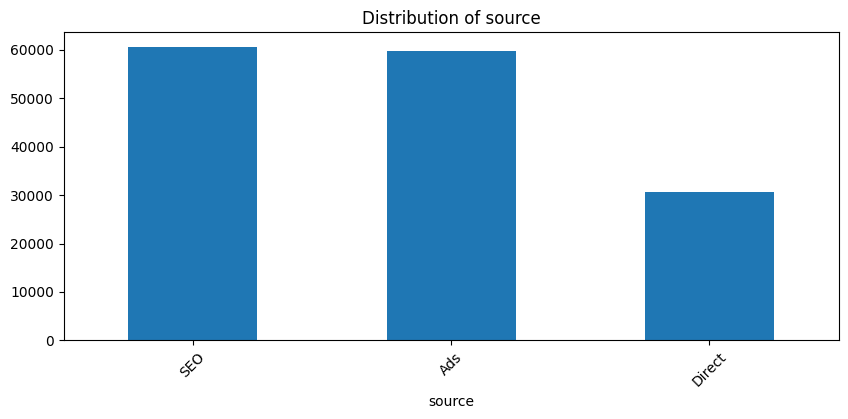


Memory usage - Current: 7949804 bytes, As category: 151511 bytes
Potential memory savings: 7798293 bytes (98.1% reduction)



=== Analysis for column: browser ===
Number of unique values: 5
Data type: object

Value counts (top 20 if many unique values):
browser
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: count, dtype: int64

Top category represents 40.65% of data


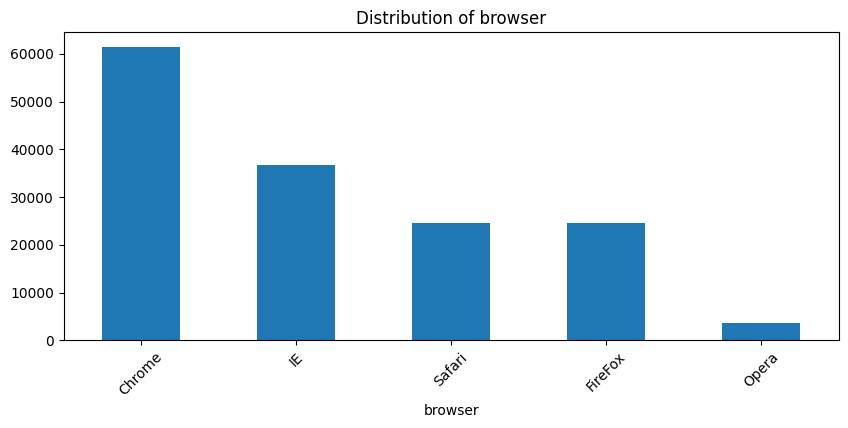


Memory usage - Current: 8185318 bytes, As category: 151687 bytes
Potential memory savings: 8033631 bytes (98.1% reduction)



=== Analysis for column: sex ===
Number of unique values: 2
Data type: object

Value counts (top 20 if many unique values):
sex
M    88293
F    62819
Name: count, dtype: int64

Top category represents 58.43% of data


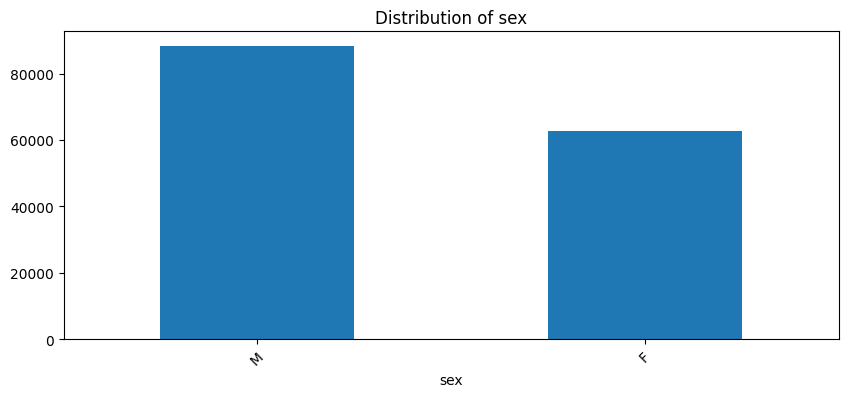


Memory usage - Current: 7555732 bytes, As category: 151452 bytes
Potential memory savings: 7404280 bytes (98.0% reduction)




In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Columns to consider for categorical conversion
cols_to_analyze = ['device_id', 'source', 'browser', 'sex']

for col in cols_to_analyze:
    print(f"\n=== Analysis for column: {col} ===")
    
    # 1. Get basic info
    n_unique = fraud_data[col].nunique()
    print(f"Number of unique values: {n_unique}")
    print(f"Data type: {fraud_data[col].dtype}")
    
    # 2. Show value counts
    value_counts = fraud_data[col].value_counts(dropna=False)
    print("\nValue counts (top 20 if many unique values):")
    print(value_counts.head(20) if n_unique > 20 else value_counts)
    
    # 3. Calculate memory usage before conversion
    mem_before = fraud_data[col].memory_usage(deep=True)
    
    # 4. Show percentage of top categories
    if n_unique > 0:
        top_percentage = value_counts.iloc[0] / len(fraud_data) * 100
        print(f"\nTop category represents {top_percentage:.2f}% of data")
    
    # 5. Plot distribution if reasonable number of categories
    if n_unique <= 20:
        plt.figure(figsize=(10, 4))
        fraud_data[col].value_counts(dropna=False).plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("\n[Too many unique values to plot effectively]")
    
    # 6. Compare memory usage if converted to category
    temp_cat = fraud_data[col].astype('category')
    mem_after = temp_cat.memory_usage(deep=True)
    print(f"\nMemory usage - Current: {mem_before} bytes, As category: {mem_after} bytes")
    print(f"Potential memory savings: {mem_before - mem_after} bytes ({((mem_before - mem_after)/mem_before)*100:.1f}% reduction)")
    
    print("\n" + "="*50 + "\n")

In [7]:
# Convert time columns to datetime
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Convert IP address to integer (already float, which is fine for merging)
fraud_data['source'] = fraud_data['source'].astype('category')
fraud_data['browser'] = fraud_data['browser'].astype('category')
fraud_data['sex'] = fraud_data['sex'].astype('category')

print(fraud_data.dtypes)

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                  category
browser                 category
sex                     category
age                        int64
ip_address               float64
class                      int64
dtype: object


4. Exploratory Data Analysis (EDA)

Univariate Analysis

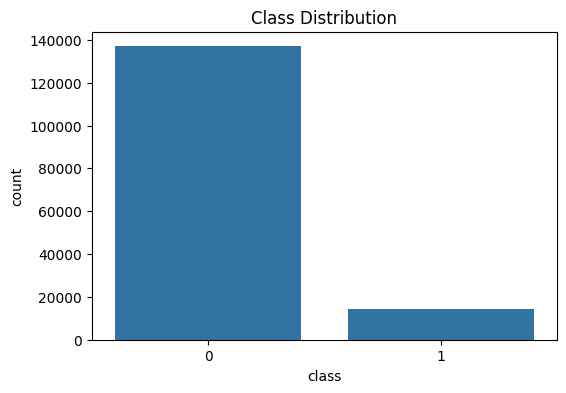

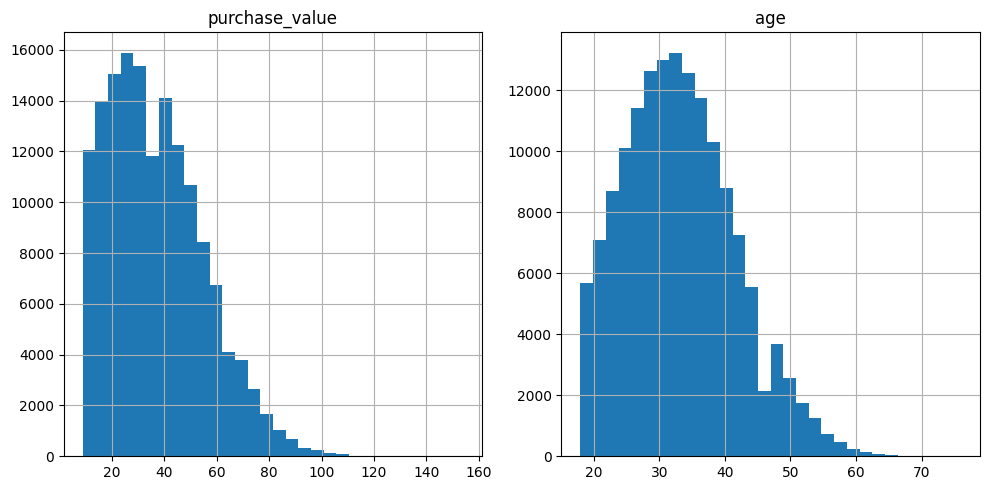

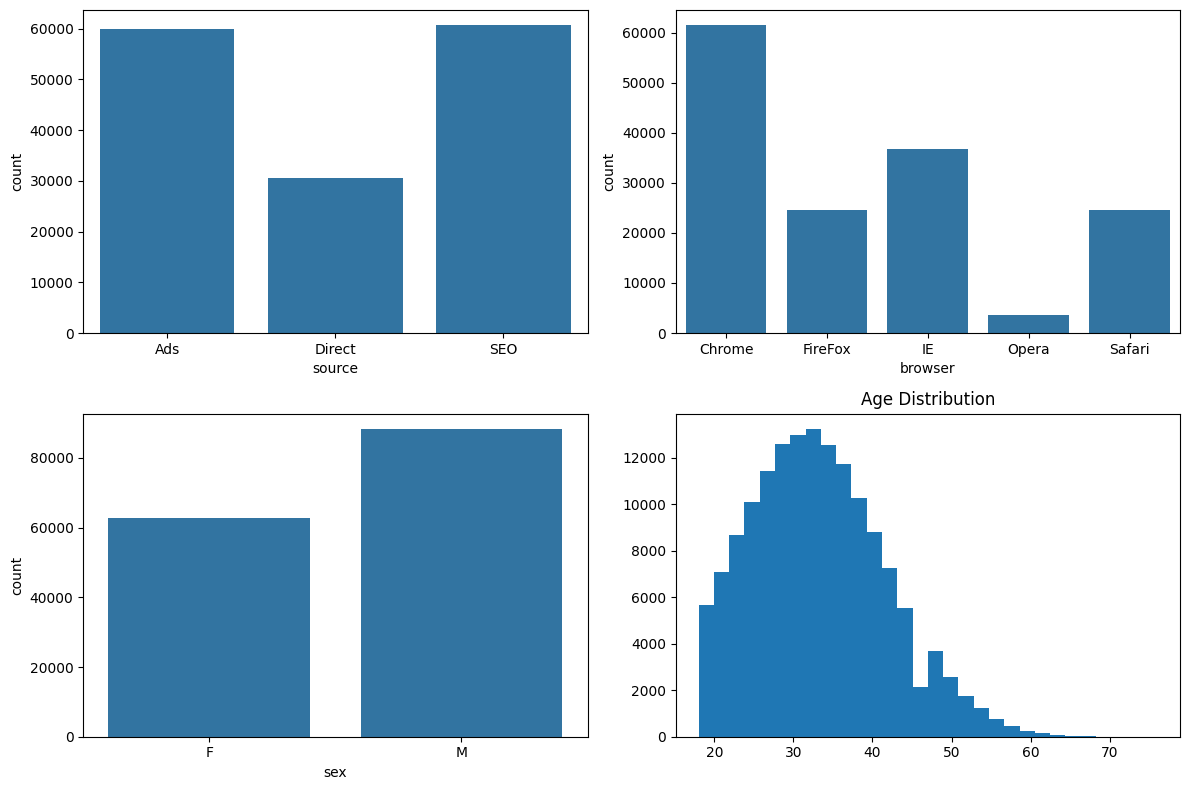

In [8]:
# Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=fraud_data)
plt.title('Class Distribution')
plt.show()

# Numerical features
fraud_data[['purchase_value', 'age']].hist(bins=30, figsize=(10,5))
plt.tight_layout()
plt.show()

# Categorical features
fig, axes = plt.subplots(2, 2, figsize=(12,8))
sns.countplot(ax=axes[0,0], x='source', data=fraud_data)
sns.countplot(ax=axes[0,1], x='browser', data=fraud_data)
sns.countplot(ax=axes[1,0], x='sex', data=fraud_data)
axes[1,1].hist(fraud_data['age'], bins=30)
axes[1,1].set_title('Age Distribution')
plt.tight_layout()
plt.show()

Bivariate Analysis

Numerical vs. Class Analysis

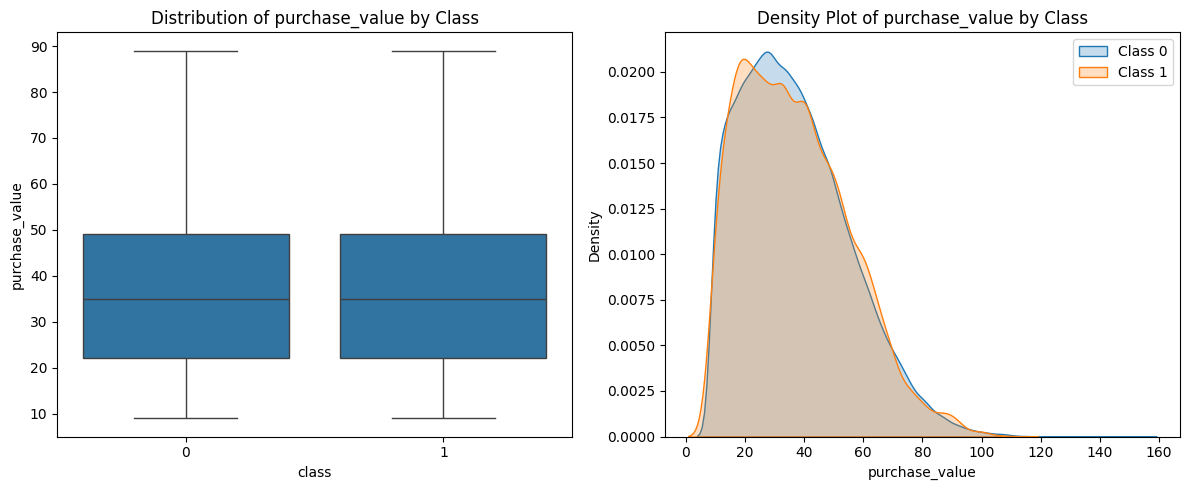


Statistical Summary for purchase_value by Class:
          count       mean        std  min   25%   50%   75%    max
class                                                              
0      136961.0  36.929418  18.315064  9.0  22.0  35.0  49.0  154.0
1       14151.0  36.993004  18.397654  9.0  22.0  35.0  49.0  111.0

Mann-Whitney U test for purchase_value: p-value = 0.7180


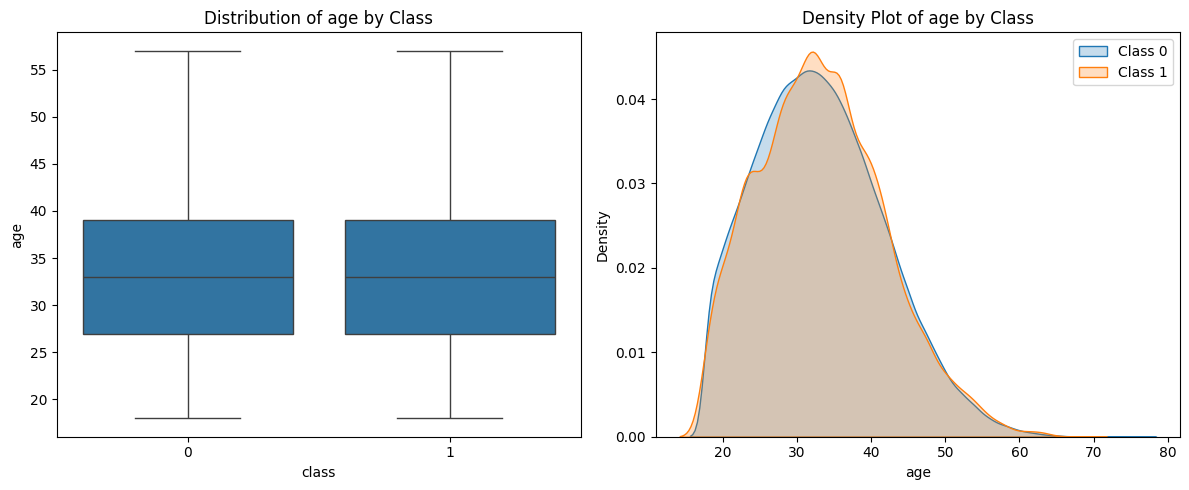


Statistical Summary for age by Class:
          count       mean       std   min   25%   50%   75%   max
class                                                             
0      136961.0  33.122356  8.622678  18.0  27.0  33.0  39.0  76.0
1       14151.0  33.318281  8.568001  18.0  27.0  33.0  39.0  68.0

Mann-Whitney U test for age: p-value = 0.0035
class          0         1
source                    
Ads     0.907934  0.092066
Direct  0.894630  0.105370
SEO     0.910715  0.089285
class           0         1
browser                    
Chrome   0.901208  0.098792
FireFox  0.904835  0.095165
IE       0.913225  0.086775
Opera    0.910773  0.089227
Safari   0.909799  0.090201
class         0         1
sex                      
F      0.908993  0.091007
M      0.904477  0.095523


In [9]:
# Relationship between features and target

numerical_cols = ['purchase_value', 'age']

for col in numerical_cols:
    plt.figure(figsize=(12, 5))
    
    # Create subplots
    plt.subplot(1, 2, 1)
    sns.boxplot(x='class', y=col, data=fraud_data, showfliers=False)
    plt.title(f'Distribution of {col} by Class')
    
    plt.subplot(1, 2, 2)
    for cls in [0, 1]:
        sns.kdeplot(fraud_data[fraud_data['class'] == cls][col], 
                   label=f'Class {cls}', fill=True)
    plt.title(f'Density Plot of {col} by Class')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print statistical summary
    print(f"\nStatistical Summary for {col} by Class:")
    print(fraud_data.groupby('class')[col].describe())
    
    # Mann-Whitney U test for significance
    from scipy.stats import mannwhitneyu
    stat, p = mannwhitneyu(fraud_data[fraud_data['class'] == 0][col],
                          fraud_data[fraud_data['class'] == 1][col])
    print(f"\nMann-Whitney U test for {col}: p-value = {p:.4f}")
    print("="*80)
    
# Cross-tabulations
print(pd.crosstab(fraud_data['source'], fraud_data['class'], normalize='index'))
print(pd.crosstab(fraud_data['browser'], fraud_data['class'], normalize='index'))
print(pd.crosstab(fraud_data['sex'], fraud_data['class'], normalize='index'))

Categorical vs. Class Analysis

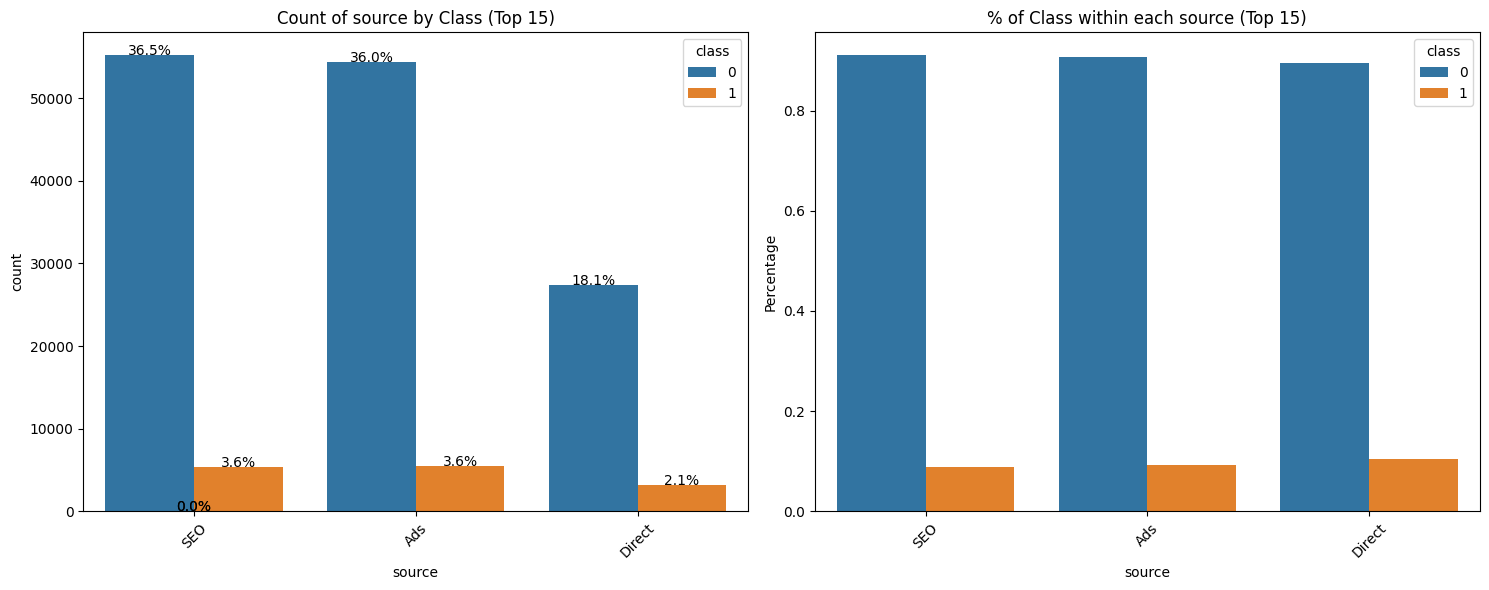


Percentage Distribution of source by Class:
class          0         1
source                    
Direct  0.894630  0.105370
Ads     0.907934  0.092066
SEO     0.910715  0.089285

Chi-square test for source: p-value = 0.0000


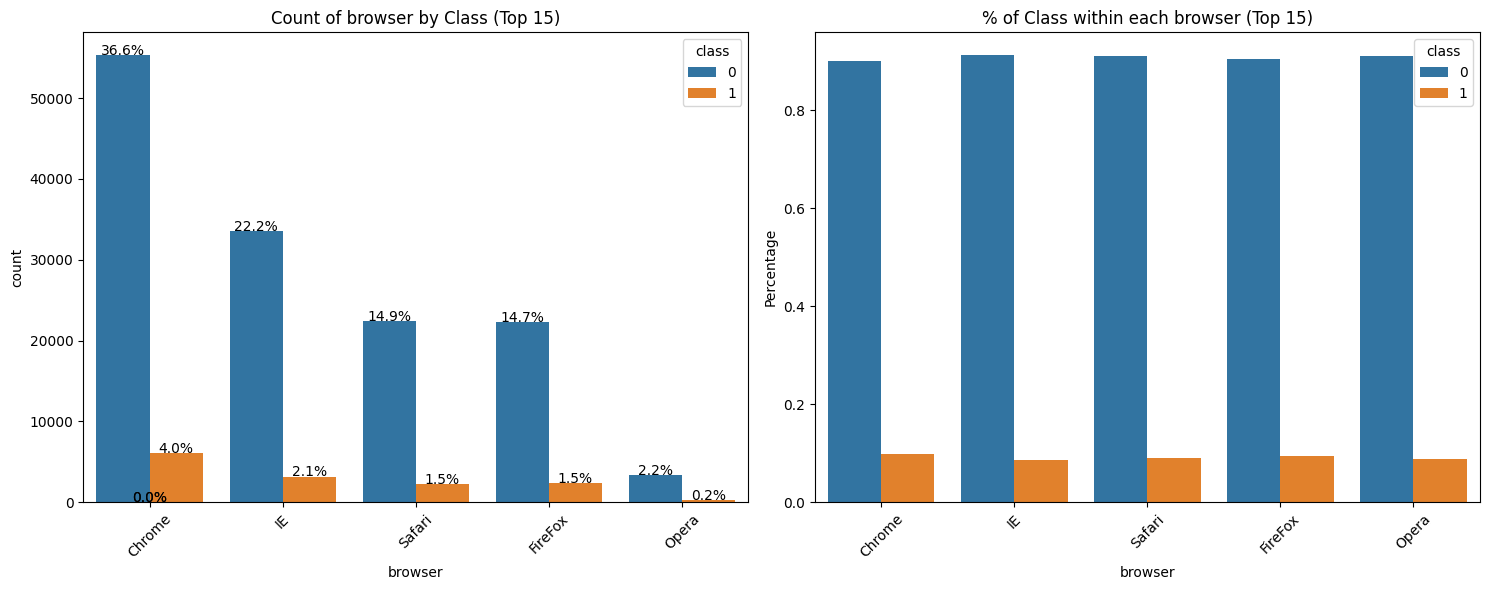


Percentage Distribution of browser by Class:
class           0         1
browser                    
Chrome   0.901208  0.098792
FireFox  0.904835  0.095165
Safari   0.909799  0.090201
Opera    0.910773  0.089227
IE       0.913225  0.086775

Chi-square test for browser: p-value = 0.0000


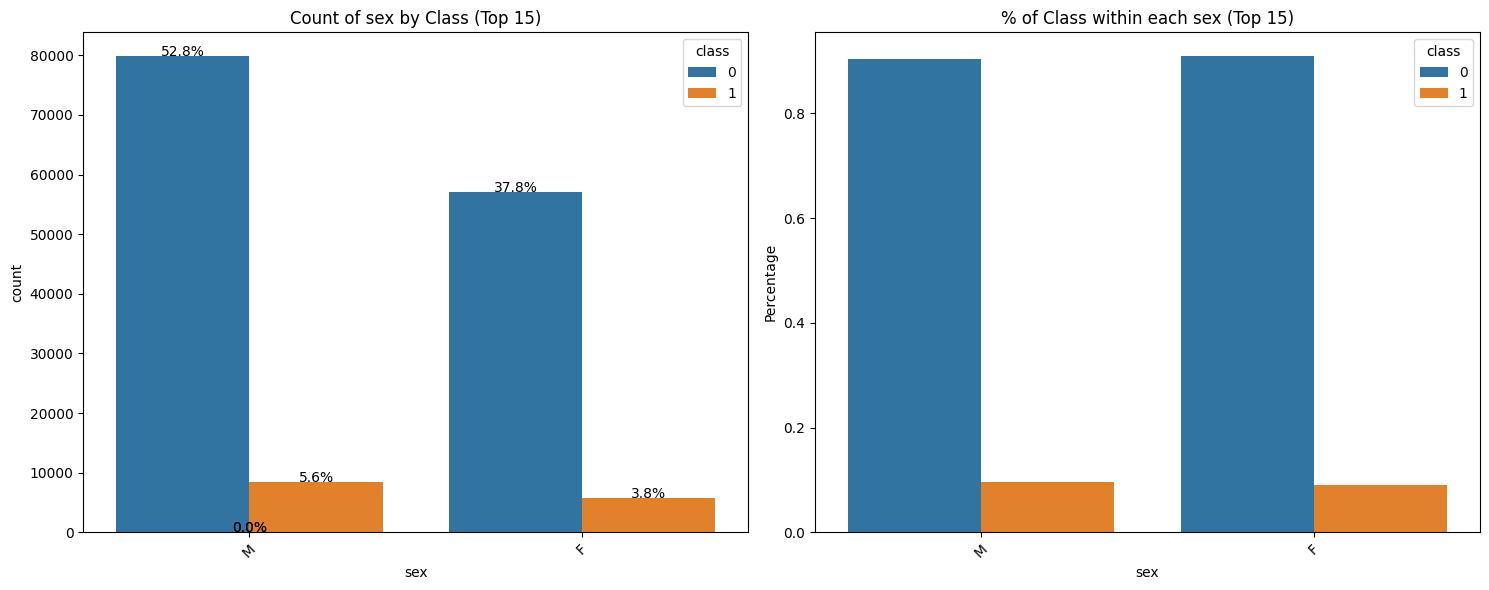


Percentage Distribution of sex by Class:
class         0         1
sex                      
M      0.904477  0.095523
F      0.908993  0.091007

Chi-square test for sex: p-value = 0.0031


In [10]:
categorical_cols = ['source', 'browser', 'sex', ]  

for col in categorical_cols:
    plt.figure(figsize=(15, 6))

    # Plot 1: Countplot
    plt.subplot(1, 2, 1)
    ax = sns.countplot(x=col, hue='class', data=fraud_data,
                      order=fraud_data[col].value_counts().iloc[:15].index)
    plt.title(f'Count of {col} by Class (Top 15)')
    plt.xticks(rotation=45)

    # Add percentages to bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 3,
               f'{height/len(fraud_data)*100:.1f}%', ha="center")

    # Plot 2: Normalized stacked bar
    plt.subplot(1, 2, 2)
    prop_df = (fraud_data.groupby(col, observed=False)['class'] 
              .value_counts(normalize=True)
              .rename('percentage')
              .reset_index())
    sns.barplot(x=col, y='percentage', hue='class', data=prop_df,
               order=fraud_data[col].value_counts().iloc[:15].index)
    plt.title(f'% of Class within each {col} (Top 15)')
    plt.xticks(rotation=45)
    plt.ylabel('Percentage')

    plt.tight_layout()
    plt.show()

    # Print contingency table with percentages
    print(f"\nPercentage Distribution of {col} by Class:")
    print(pd.crosstab(fraud_data[col], fraud_data['class'],
                    normalize='index').sort_values(by=1, ascending=False).head(15))

    # Chi-square test for significance
    from scipy.stats import chi2_contingency
    contingency_table = pd.crosstab(fraud_data[col], fraud_data['class'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-square test for {col}: p-value = {p:.4f}")
    print("="*80)


5. Merge Datasets for Geolocation Analysis

In [11]:
# Load IP to Country mapping
ip_country = load_data('../data/raw/IpAddress_to_Country.csv')



Data loaded successfully from ../data/raw/IpAddress_to_Country.csv


In [12]:
ip_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [13]:
# Convert IP ranges to numeric
ip_country['lower_bound_ip_address'] = ip_country['lower_bound_ip_address'].astype('float64')
ip_country['upper_bound_ip_address'] = ip_country['upper_bound_ip_address'].astype('float64')

# Function to find country for each IP
def find_country(ip):
    country = ip_country[(ip_country['lower_bound_ip_address'] <= ip) & 
                        (ip_country['upper_bound_ip_address'] >= ip)]
    if not country.empty:
        return country.iloc[0]['country']
    return None

# Apply to fraud data 
fraud_data['country'] = fraud_data['ip_address'].apply(find_country)

# Check results
fraud_data['country'].value_counts()

country
United States        58049
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
                     ...  
Yemen                    1
San Marino               1
Burundi                  1
Nauru                    1
Guadeloupe               1
Name: count, Length: 181, dtype: int64

In [14]:
# Check percentage of missing countries
missing_country_pct = fraud_data['country'].isna().mean() * 100
print(f"Percentage of transactions with missing country: {missing_country_pct:.2f}%")

# Check if missingness correlates with fraud
missing_vs_fraud = fraud_data.groupby(fraud_data['country'].isna())['class'].mean()
print("\nFraud rate for transactions with/without country:")
print(missing_vs_fraud)

Percentage of transactions with missing country: 14.54%

Fraud rate for transactions with/without country:
country
False    0.094993
True     0.085723
Name: class, dtype: float64


In [15]:
fraud_data['country'] = fraud_data['country'].fillna('Unknown')

6. Feature Engineering

Transaction frequency and velocity

Transaction frequency

In [16]:
# Calculate transactions per user (frequency)
user_transaction_counts = fraud_data['user_id'].value_counts().reset_index()
user_transaction_counts.columns = ['user_id', 'transaction_count']
fraud_data = fraud_data.merge(user_transaction_counts, on='user_id', how='left')

fraud_data


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_count
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands,1
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan,1
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States,1


velocity

In [17]:
# First, ensure we don't have duplicate columns
velocity_cols = ['avg_purchase_velocity', 'min_purchase_velocity', 
                'max_purchase_velocity', 'purchase_count']
fraud_data = fraud_data.drop(columns=[col for col in velocity_cols if col in fraud_data.columns])

# Sort by user and purchase time
fraud_data_sorted = fraud_data.sort_values(['user_id', 'purchase_time'])

# Calculate time differences
fraud_data_sorted['time_since_last_purchase'] = (
    fraud_data_sorted.groupby('user_id')['purchase_time']
    .diff()
    .dt.total_seconds()
)

# For first transactions per user, fill with time since signup
first_trans_mask = fraud_data_sorted.groupby('user_id')['purchase_time'].rank(method='first') == 1
fraud_data_sorted.loc[first_trans_mask, 'time_since_last_purchase'] = (
    fraud_data_sorted.loc[first_trans_mask, 'purchase_time'] - 
    fraud_data_sorted.loc[first_trans_mask, 'signup_time']
).dt.total_seconds()

# Calculate velocity metrics - only for users with multiple transactions
user_velocity = fraud_data_sorted.groupby('user_id').agg(
    transaction_count=('purchase_time', 'count'),
    avg_purchase_velocity=('time_since_last_purchase', 'mean'),
    min_purchase_velocity=('time_since_last_purchase', 'min'),
    max_purchase_velocity=('time_since_last_purchase', 'max')
).reset_index()

# Drop existing transaction_count columns to avoid merge conflicts
fraud_data = fraud_data.drop(columns=[col for col in fraud_data.columns if col.startswith('transaction_count')])

# Merge back with original data
fraud_data = fraud_data.merge(user_velocity, on='user_id', how='left')

# Handle users with single transactions
fraud_data['transaction_count'] = fraud_data['transaction_count'].fillna(1)
fraud_data['avg_purchase_velocity'] = fraud_data['avg_purchase_velocity'].fillna(30*24*60*60)  # 30 days
fraud_data['min_purchase_velocity'] = fraud_data['min_purchase_velocity'].fillna(30*24*60*60)
fraud_data['max_purchase_velocity'] = fraud_data['max_purchase_velocity'].fillna(30*24*60*60)

# Create improved velocity features
fraud_data['time_since_signup'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.total_seconds()

# Velocity ratio - more robust calculation
fraud_data['velocity_ratio'] = np.where(
    fraud_data['transaction_count'] > 1,
    fraud_data['time_since_signup'] / fraud_data['avg_purchase_velocity'],
    fraud_data['time_since_signup'] / (30*24*60*60)  # Baseline for single-transaction users
)

# Merge time_since_last_purchase from fraud_data_sorted into fraud_data
fraud_data = fraud_data.merge(
    fraud_data_sorted[['user_id', 'purchase_time', 'time_since_last_purchase']],
    on=['user_id', 'purchase_time'],
    how='left'
)

# Create additional velocity features
fraud_data['velocity_deviation'] = np.where(
    fraud_data['transaction_count'] > 1,
    (fraud_data['time_since_last_purchase'] - fraud_data['avg_purchase_velocity']) /
    (fraud_data['avg_purchase_velocity'] + 1e-6),
    0  # No deviation for single-transaction users
)

fraud_data['is_velocity_outlier'] = (
    (fraud_data['velocity_deviation'].abs() > 2).astype(int)
)

fraud_data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,country,transaction_count,avg_purchase_velocity,min_purchase_velocity,max_purchase_velocity,time_since_signup,velocity_ratio,time_since_last_purchase,velocity_deviation,is_velocity_outlier
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,Japan,1,4506682.0,4506682.0,4506682.0,4506682.0,1.738689e+00,4506682.0,0.0,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,...,United States,1,17944.0,17944.0,17944.0,17944.0,6.922840e-03,17944.0,0.0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,...,United States,1,1.0,1.0,1.0,1.0,3.858025e-07,1.0,0.0,0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,...,Unknown,1,492085.0,492085.0,492085.0,492085.0,1.898476e-01,492085.0,0.0,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,...,United States,1,4361461.0,4361461.0,4361461.0,4361461.0,1.682662e+00,4361461.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,...,United States,1,5261233.0,5261233.0,5261233.0,5261233.0,2.029797e+00,5261233.0,0.0,0
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,...,Netherlands,1,931270.0,931270.0,931270.0,931270.0,3.592863e-01,931270.0,0.0,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,...,Japan,1,6681616.0,6681616.0,6681616.0,6681616.0,2.577784e+00,6681616.0,0.0,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,...,United States,1,5146119.0,5146119.0,5146119.0,5146119.0,1.985385e+00,5146119.0,0.0,0


In [18]:
print(fraud_data.isna().sum())
fraud_data.drop(columns=['time_since_last_purchase'], inplace=True)

user_id                     0
signup_time                 0
purchase_time               0
purchase_value              0
device_id                   0
source                      0
browser                     0
sex                         0
age                         0
ip_address                  0
class                       0
country                     0
transaction_count           0
avg_purchase_velocity       0
min_purchase_velocity       0
max_purchase_velocity       0
time_since_signup           0
velocity_ratio              0
time_since_last_purchase    0
velocity_deviation          0
is_velocity_outlier         0
dtype: int64


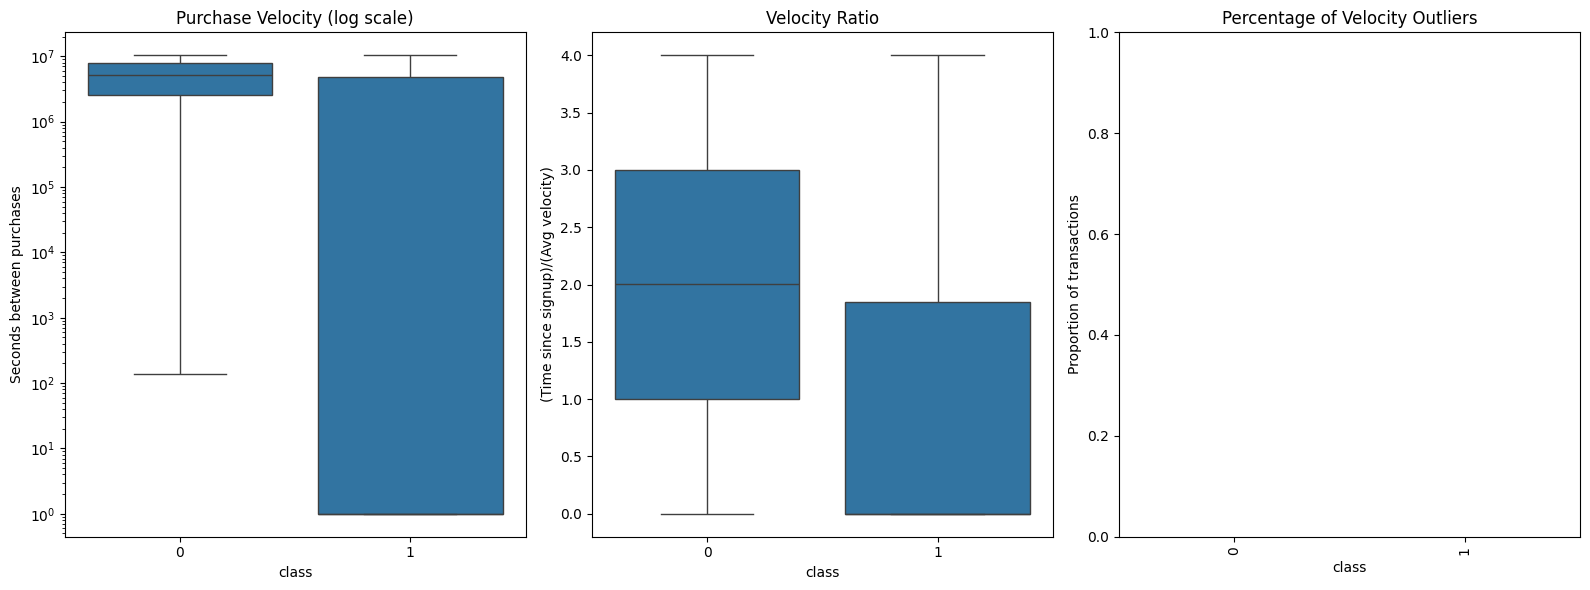

In [19]:
# Set up the figure
plt.figure(figsize=(16, 6))

# Plot 1: Velocity distribution by class
plt.subplot(1, 3, 1)
sns.boxplot(x='class', y='avg_purchase_velocity', data=fraud_data, showfliers=False)
plt.yscale('log')
plt.title('Purchase Velocity (log scale)')
plt.ylabel('Seconds between purchases')

# Plot 2: Velocity ratio by class
plt.subplot(1, 3, 2)
sns.boxplot(x='class', y='velocity_ratio', data=fraud_data, showfliers=False)
plt.title('Velocity Ratio')
plt.ylabel('(Time since signup)/(Avg velocity)')

# Plot 3: Outlier percentage by class
plt.subplot(1, 3, 3)
fraud_data.groupby('class')['is_velocity_outlier'].mean().plot(kind='bar')
plt.title('Percentage of Velocity Outliers')
plt.ylabel('Proportion of transactions')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

Time-Based features

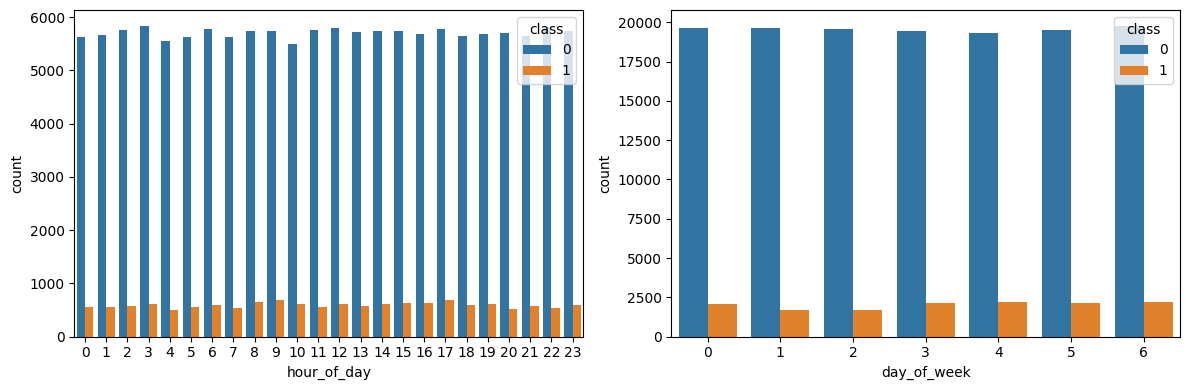

In [20]:
# Extract hour and day of week
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek

# Time since signup (in seconds)
fraud_data['time_since_signup'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.total_seconds()

# Visualize time-based features
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x='hour_of_day', hue='class', data=fraud_data)
plt.subplot(1,2,2)
sns.countplot(x='day_of_week', hue='class', data=fraud_data)
plt.tight_layout()
plt.show()

7. Data Transformation

Handle Class Imbalance

class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


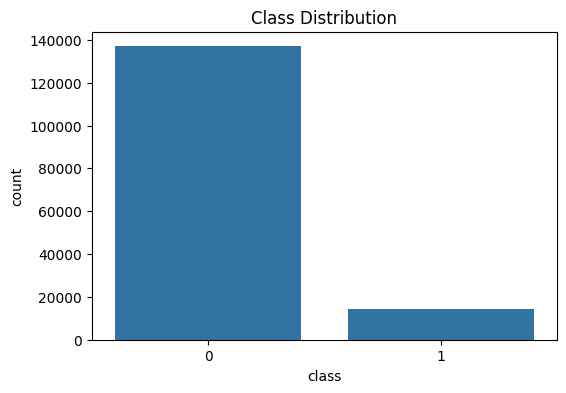

In [21]:
# Check class distribution
print(fraud_data['class'].value_counts(normalize=True))

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=fraud_data)
plt.title('Class Distribution')
plt.show()

In [22]:

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# First, prepare features and target
X = fraud_data.drop(['class', 'user_id', 'signup_time', 'purchase_time', 'device_id', 'ip_address', 'country'], axis=1)
y = fraud_data['class']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split data before handling imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Original class counts: {np.bincount(y)}")
print(f"Training class counts before SMOTE: {np.bincount(y_train)}")
print(f"Training class counts after SMOTE: {np.bincount(y_train_smote)}")

Original class counts: [136961  14151]
Training class counts before SMOTE: [109568  11321]
Training class counts after SMOTE: [109568 109568]


Normalization and Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data only
scaler.fit(X_train_smote)

# Transform both training and test data
X_train_scaled = scaler.transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)



Encode Categorical Features

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = ['source', 'browser', 'sex'] 

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform on training data
encoded_train = encoder.fit_transform(X_train_smote[categorical_cols])
encoded_test = encoder.transform(X_test[categorical_cols])

# Get feature names
encoded_features = encoder.get_feature_names_out(categorical_cols)

# Create DataFrames
encoded_train_df = pd.DataFrame(encoded_train, columns=encoded_features)
encoded_test_df = pd.DataFrame(encoded_test, columns=encoded_features)

# Drop original columns and concatenate
X_train_final = pd.concat([
    X_train_smote.drop(categorical_cols, axis=1).reset_index(drop=True),
    encoded_train_df
], axis=1)

X_test_final = pd.concat([
    X_test.drop(categorical_cols, axis=1).reset_index(drop=True),
    encoded_test_df
], axis=1)

Since I have already encoded the categorical values using dummies the One Encode will not work. We can just take the copy

In [28]:
X_train_final = X_train_smote.copy()
X_test_final = X_test.copy()

Save the dataset

In [30]:

fraud_data.to_csv('../data/processed/fraud_data_processed.csv', index=False)
